# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

We are going to take the following approach to complete this task:
1. Exploratory Data Analysis
2. Feature Engineering
3. Preparing the data for modeling
4. Modeling
5. Experimentation

### 1. Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

**Import packages**

In [1]:
# Import pandas 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

**Load data**

In [2]:
# Load the data set and save it in a variable df
df = pd.read_csv("../data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

**Descriptive statistics of data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

**Data visualization**

Now let's dive deeper into dataframe.

We will create helper functions to help us visualize the data

In [8]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )
    
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Incomplete", "Complete"], loc=legend_)
    # Labels
    plt.ylabel("Customers booking (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    
    # Iterate over the plotted rectangles/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == "0.0":
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [9]:
# Create a column to uniqely identify each customers booking
df["booking_id"] = df.index
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_id
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,3
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,4


**Completed booking**

In [10]:
df["booking_complete"].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Out of the 50000 customer bookings, 42522 did not complete their booking, while 7478 completed their bookings.

In [11]:
# create a dataframe of percentage of completed and incomplete booking
completed_booking = df[["booking_complete", "booking_id"]]
completed_booking.columns = ["booking_complete", "Customers"]
completed_booking_total = completed_booking.groupby("booking_complete").count()
completed_booking_percentage = completed_booking_total / completed_booking_total.sum() * 100

In [12]:
completed_booking_percentage.T

booking_complete,0,1
Customers,85.044,14.956


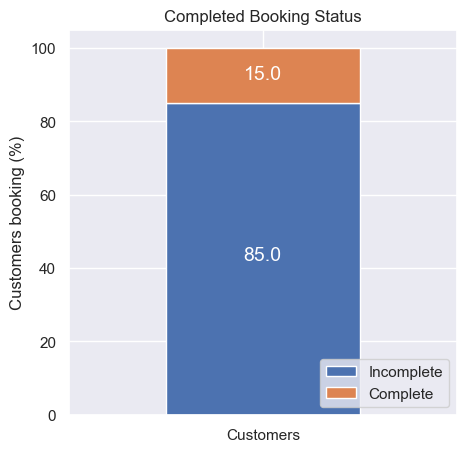

In [13]:
# Plot the pacentage of completed and incompleted bookings
plot_stacked_bars(completed_booking_percentage.transpose(), 
                 "Completed Booking Status", 
                 (5, 5), 
                 legend_="lower right")

15% of the customers completed their bookings.

**Sales Channel**

In [14]:
# create a dataframe of percentage of sales channel bookings
channel = df[["booking_id", "sales_channel", "booking_complete"]]
channel = channel.groupby(["sales_channel", "booking_complete"])["booking_id"].count().unstack(level=1).fillna(0)
channel_completed_booking = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [15]:
channel

booking_complete,0,1
sales_channel,,
Internet,37513,6869
Mobile,5009,609


In [16]:
channel.sum(axis=1)

sales_channel
Internet    44382
Mobile       5618
dtype: int64

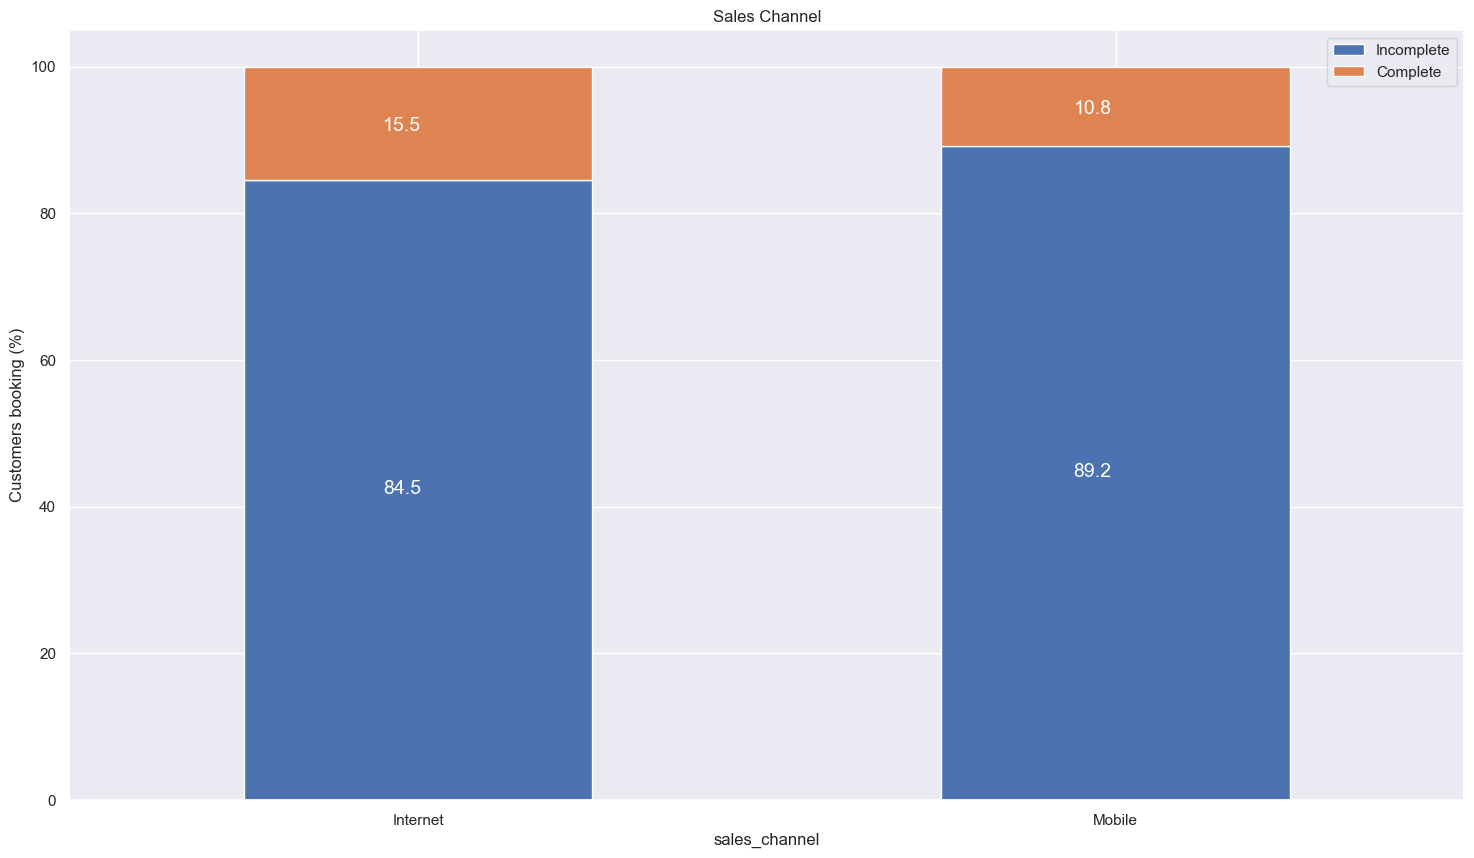

In [17]:
# Plot the sales channel customer completed booking
plot_stacked_bars(channel_completed_booking,
                 "Sales Channel")

44382 customers booked over the internet, 15% of which completed their bookings while of the 5618 who's booking channel was mobile,  ~11% completed their booking. Apparently, more customers book over the internet.

This indicate that most of British Airways customers book over the internet.

**Trip type**

In [18]:
# Create a dataframe for percentage of trip type of completed booking
trip_type = pd.crosstab(df["trip_type"], df["booking_complete"])
trip_type_completed_booking = (trip_type.div(trip_type.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [19]:
trip_type

booking_complete,0,1
trip_type,,
CircleTrip,111,5
OneWay,367,20
RoundTrip,42044,7453


In [20]:
trip_type.sum(axis=1)

trip_type
CircleTrip      116
OneWay          387
RoundTrip     49497
dtype: int64

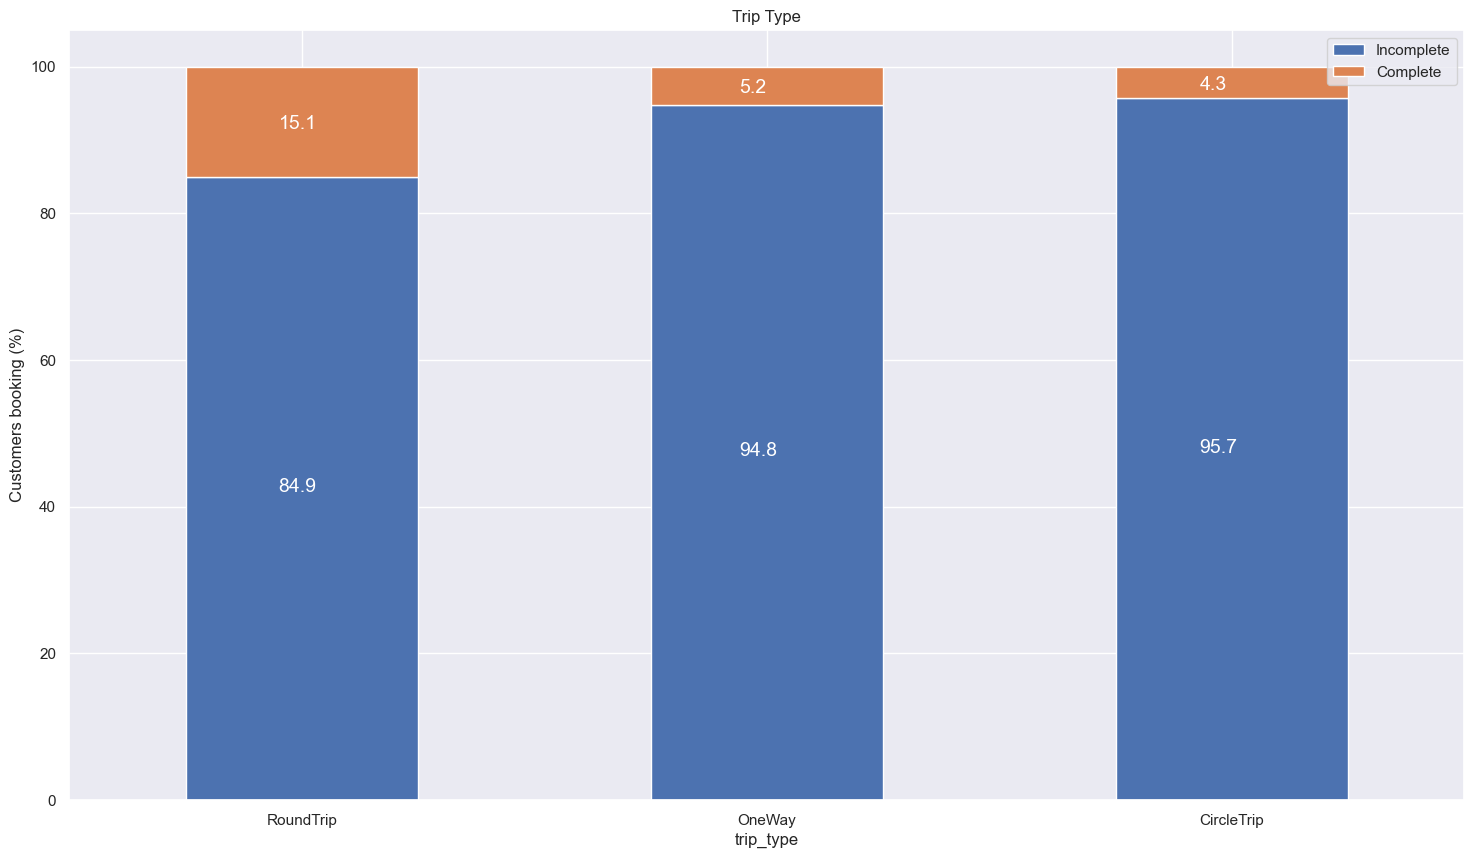

In [21]:
# Plot trip type completed booking
plot_stacked_bars(trip_type_completed_booking, 
                 "Trip Type")

Majority of the customers book for round trips of which 15% completed their booking. Incentives can be offered to customers who book for round trips to encourage more to complete their bookings.

**Flight day**

In [22]:
# Create a dataframe for percentage of trip type of completed booking
day = pd.crosstab(df["flight_day"], df["booking_complete"])
day_completed_booking = (day.div(day.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [23]:
day

booking_complete,0,1
flight_day,,
1,6898,1204
2,6544,1129
3,6422,1252
4,6302,1122
5,5778,983
6,4951,861
7,5627,927


In [24]:
day.sum(axis=1)

flight_day
1    8102
2    7673
3    7674
4    7424
5    6761
6    5812
7    6554
dtype: int64

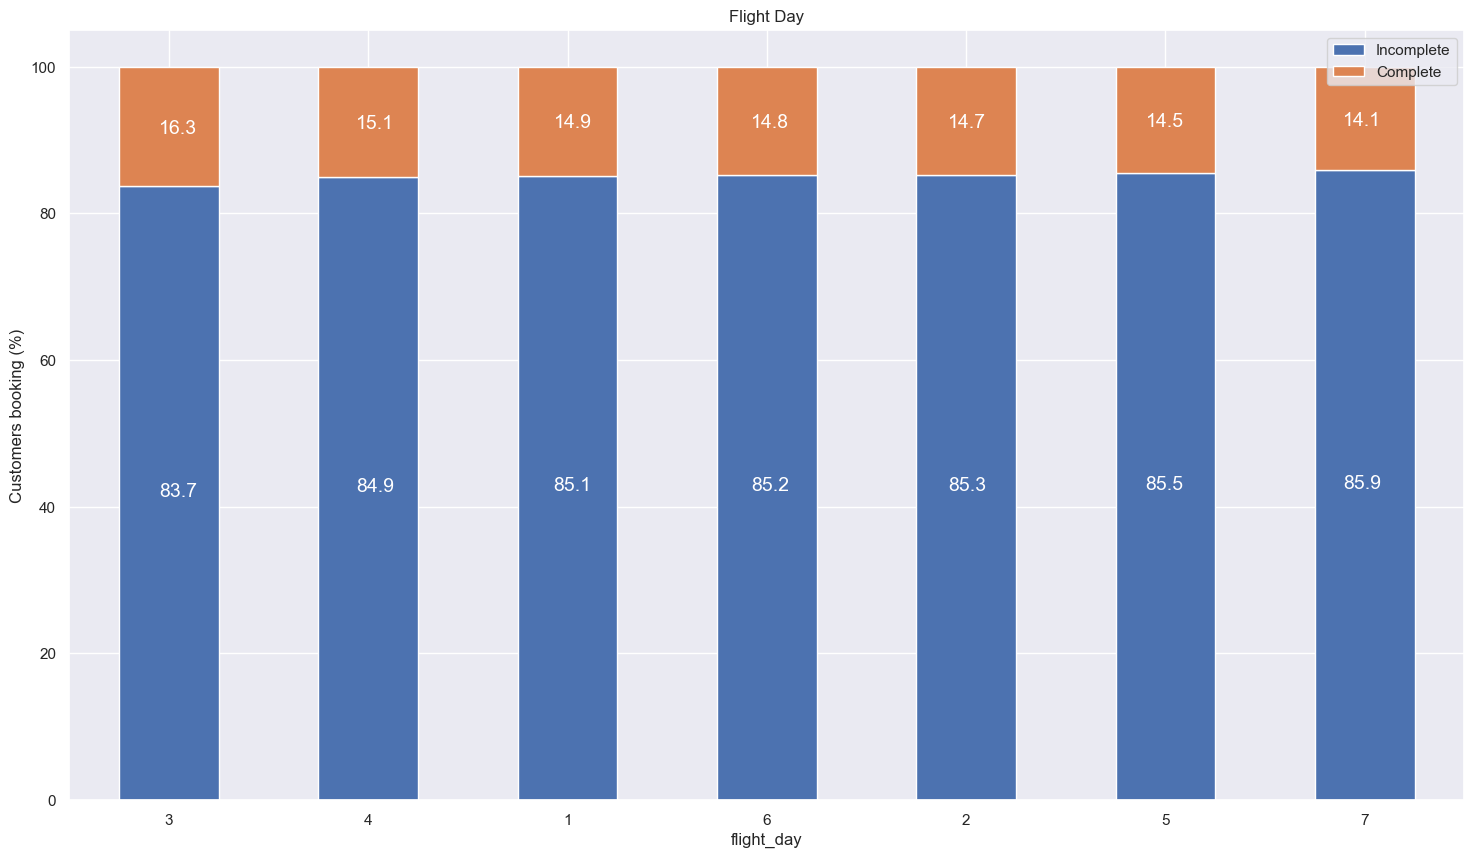

In [25]:
# Plot flight day completed booking
plot_stacked_bars(day_completed_booking, 
                 "Flight Day")

The customers who completed their bookings are evenly distributed over the days of the week. No particular day stands out

**Extra Baggage**

In [26]:
# Create a dataframe for route
extra_baggage = pd.crosstab(df["wants_extra_baggage"], df["booking_complete"])
extra_baggage_completed = (extra_baggage.div(extra_baggage.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [27]:
extra_baggage

booking_complete,0,1
wants_extra_baggage,,
0,14656,1905
1,27866,5573


In [28]:
extra_baggage.sum(axis=1)

wants_extra_baggage
0    16561
1    33439
dtype: int64

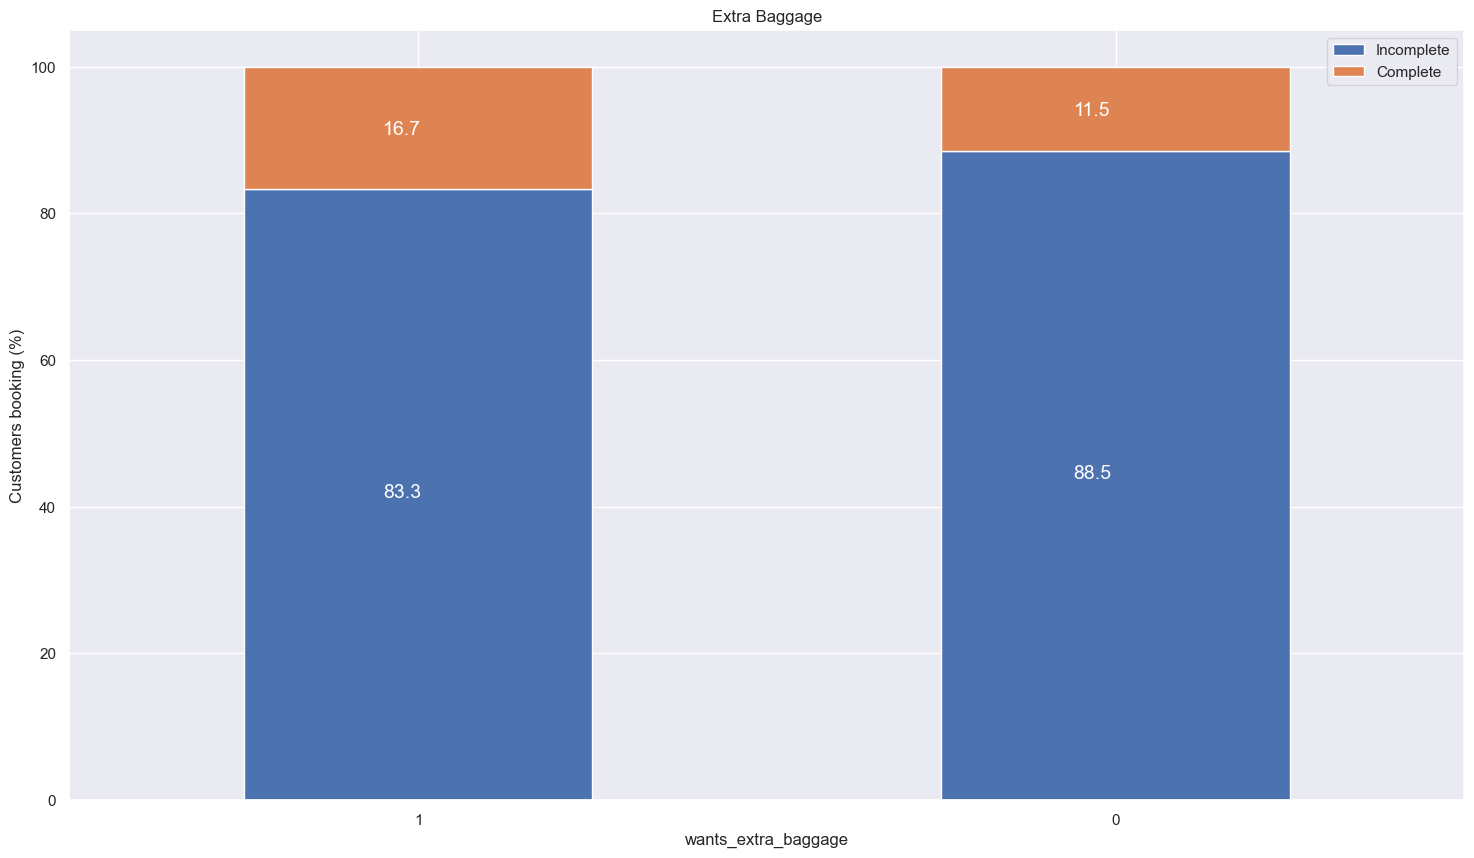

In [29]:
# Plot extra baggage
plot_stacked_bars(extra_baggage_completed, 
                 "Extra Baggage")

Customers who want extra baggage were ~5% more likely to complete their bookings against those who do not want extra baggage.

**Wants Preferred Seat**

In [30]:
# Create a dataframe for wanted preferred seat for completed booking
wants_seat = pd.crosstab(df["wants_preferred_seat"], df["booking_complete"])
wants_seat_percentage = (wants_seat.div(wants_seat.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [31]:
wants_seat

booking_complete,0,1
wants_preferred_seat,,
0,30303,4849
1,12219,2629


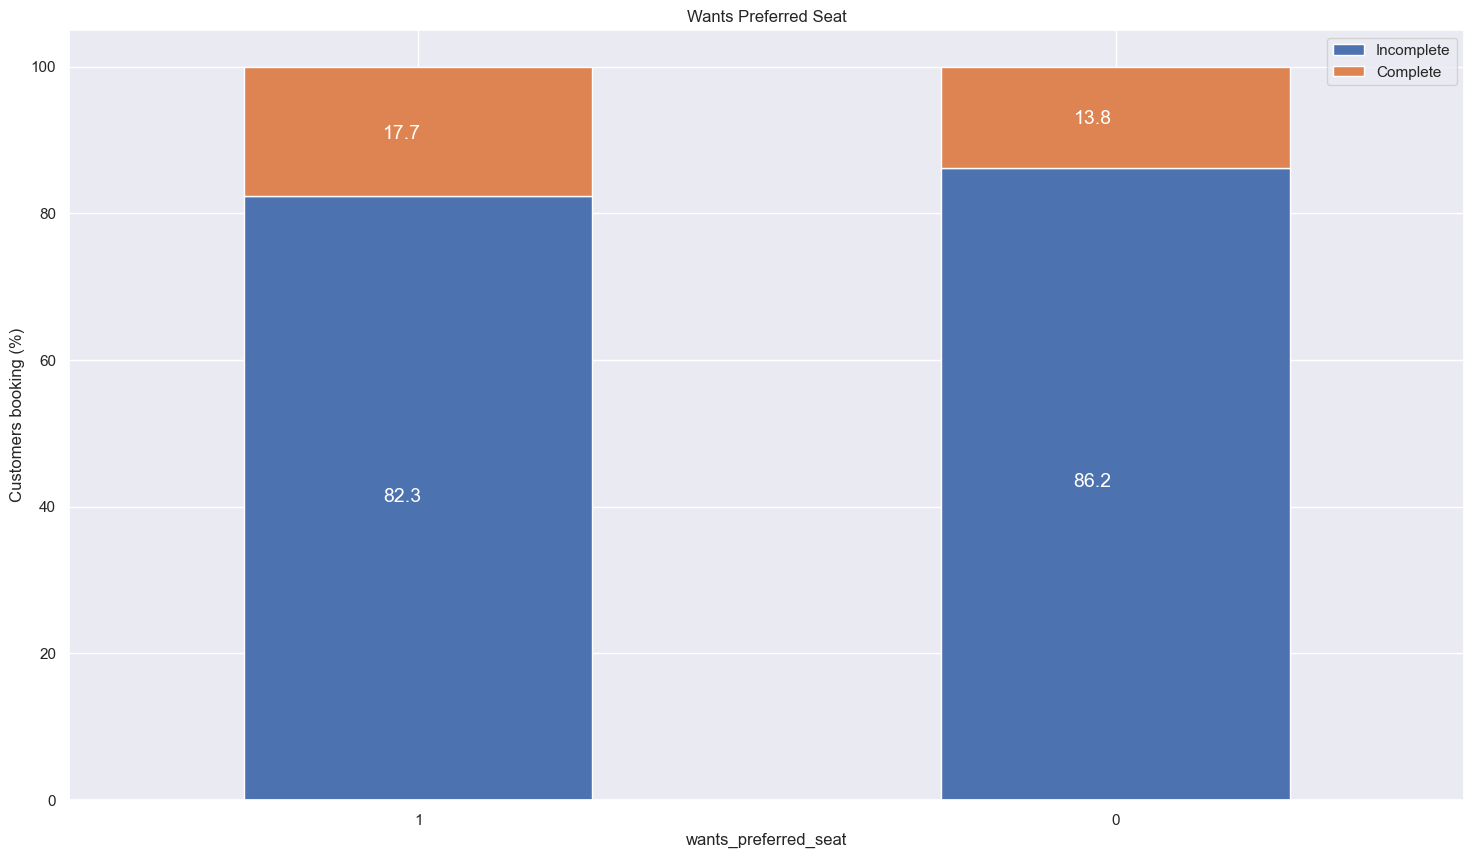

In [32]:
# Plot wanted seat
plot_stacked_bars(wants_seat_percentage, 
                 "Wants Preferred Seat")

This is also similar to wants extra baggage. Customers who wanted preferred seats are ~4% more likely to complete booking that customers who did not want a preferred seat. But the number of customers who completed booking but did not want a preferred seat (4849) are almost double the number of customer who completed booking and wanted a preferred seat (2629).

**Wants Meal**

In [33]:
# Creat a dataframe of wats meal completed booking
wants_meal = pd.crosstab(df["wants_in_flight_meals"], df["booking_complete"])
wants_meal_percentage = (wants_meal.div(wants_meal.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [34]:
wants_meal

booking_complete,0,1
wants_in_flight_meals,,
0,24593,4050
1,17929,3428


In [35]:
wants_meal.sum(axis=1)

wants_in_flight_meals
0    28643
1    21357
dtype: int64

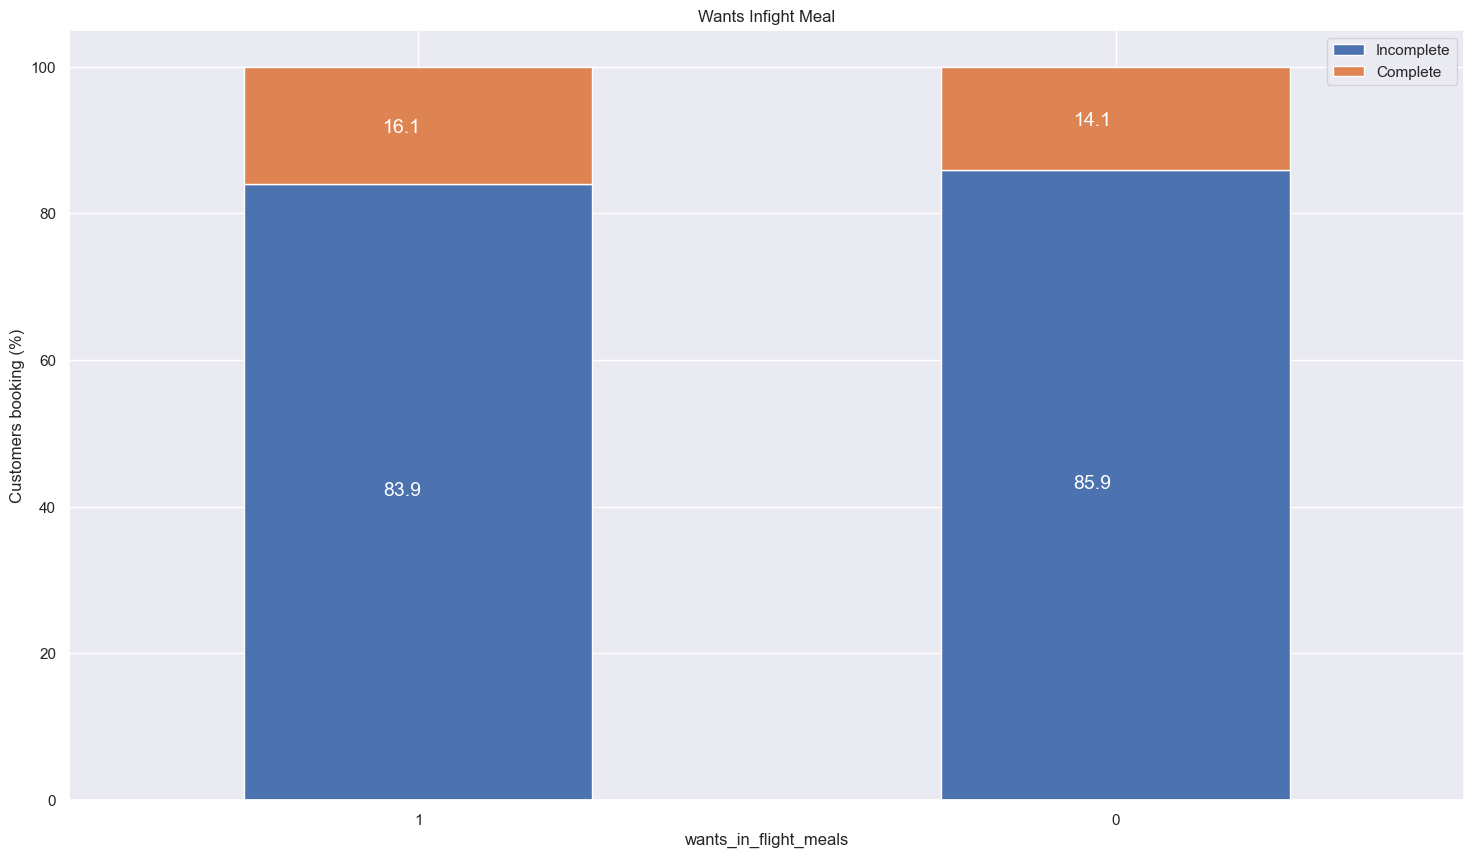

In [36]:
# Plot wants meal
plot_stacked_bars(wants_meal_percentage, 
                 "Wants Infight Meal")

There is much similarity between the two sets of customers.

**Route**

In [37]:
route_list = list(df["route"].value_counts().head(10).index)

In [38]:
# Create dataframe fot the top 10 routes
top_10_route = df[df["route"].isin(route_list)]
top_10_route = pd.crosstab(top_10_route["route"], top_10_route["booking_complete"])
top_10_route_percentage = (top_10_route.div(top_10_route.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [39]:
top_10_route.sort_values(by=[1], ascending=False)

booking_complete,0,1
route,,
AKLKUL,2113,567
PENTPE,523,401
DMKKIX,557,187
MELPEN,512,137
ICNSIN,711,90
DPSICN,609,57
MELSGN,799,43
DMKOOL,615,40
DMKPER,642,37


In [40]:
top_10_route.sum(axis=1)

route
AKLKUL    2680
DMKKIX     744
DMKOOL     655
DMKPER     679
DPSICN     666
ICNSIN     801
ICNSYD     695
MELPEN     649
MELSGN     842
PENTPE     924
dtype: int64

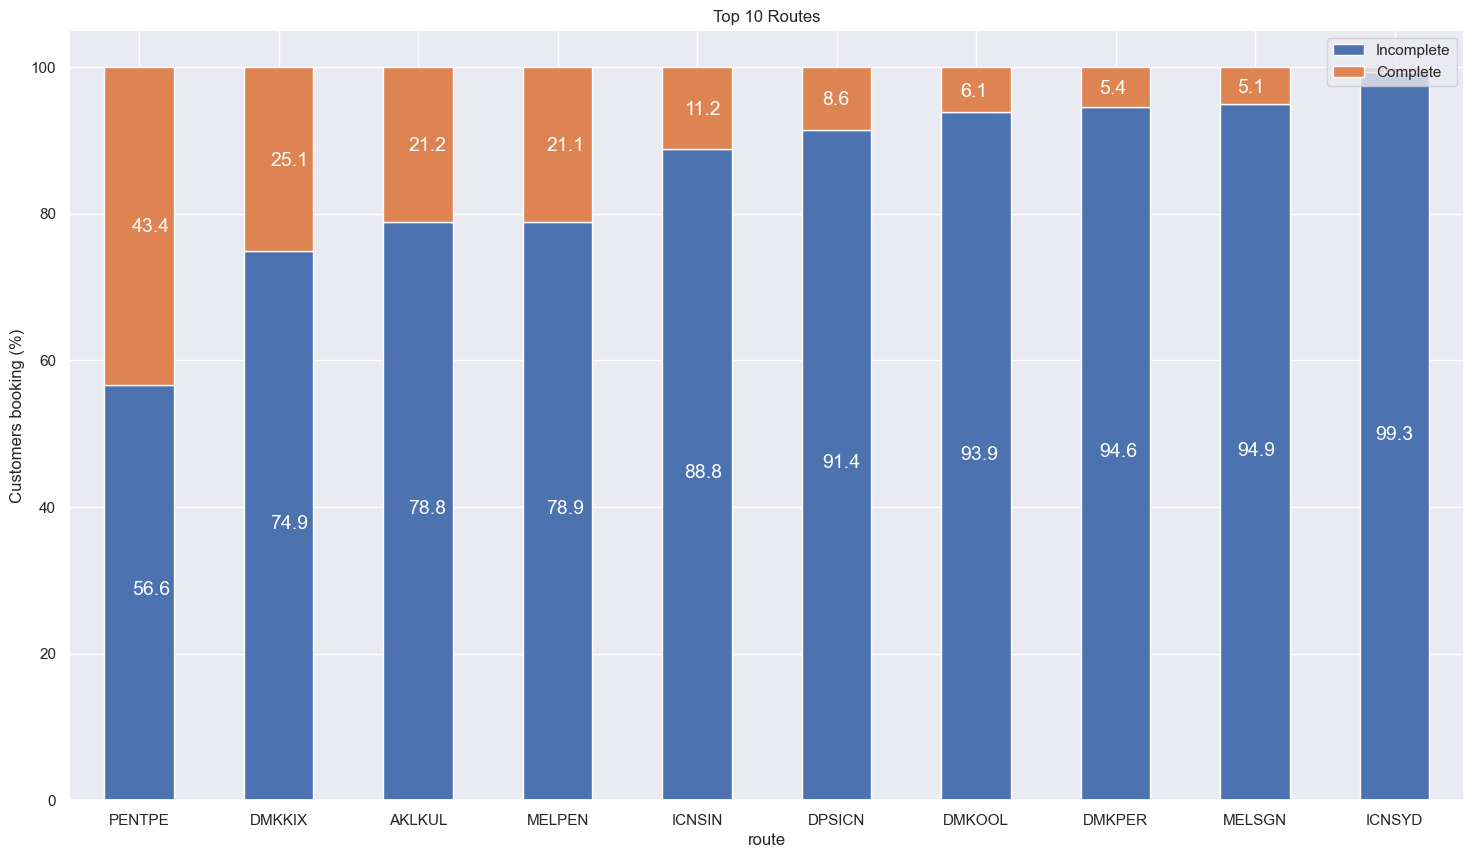

In [41]:
# Plot route
plot_stacked_bars(top_10_route_percentage, 
                 "Top 10 Routes")

Interestingly, ~43% of passengers from `PENTPE` route completed their booking. This is almost double the percentage of all other individual route.

In [42]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_id
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,3
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,4


**Booking Origin**

In [43]:
top_10_book_origin = list(df["booking_origin"].value_counts().head(10).index)

In [44]:
# Create dataframe for the top 10 routes
top_10_book_origin = df[df["booking_origin"].isin(top_10_book_origin)]
top_10_book_origin = pd.crosstab(top_10_book_origin["booking_origin"], top_10_book_origin["booking_complete"])
top_10_book_origin_percentage = (top_10_book_origin.div(top_10_book_origin.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [45]:
top_10_book_origin.sort_values(by=[1], ascending=False)

booking_complete,0,1
booking_origin,,
Malaysia,4706,2468
Australia,16972,900
China,2693,694
Indonesia,1754,615
Japan,3407,478
Thailand,1560,470
South Korea,4097,462
Taiwan,1853,224
India,1139,131


In [46]:
top_10_book_origin.sum(axis=1)

booking_origin
Australia      17872
China           3387
India           1270
Indonesia       2369
Japan           3885
Malaysia        7174
New Zealand     1074
South Korea     4559
Taiwan          2077
Thailand        2030
dtype: int64

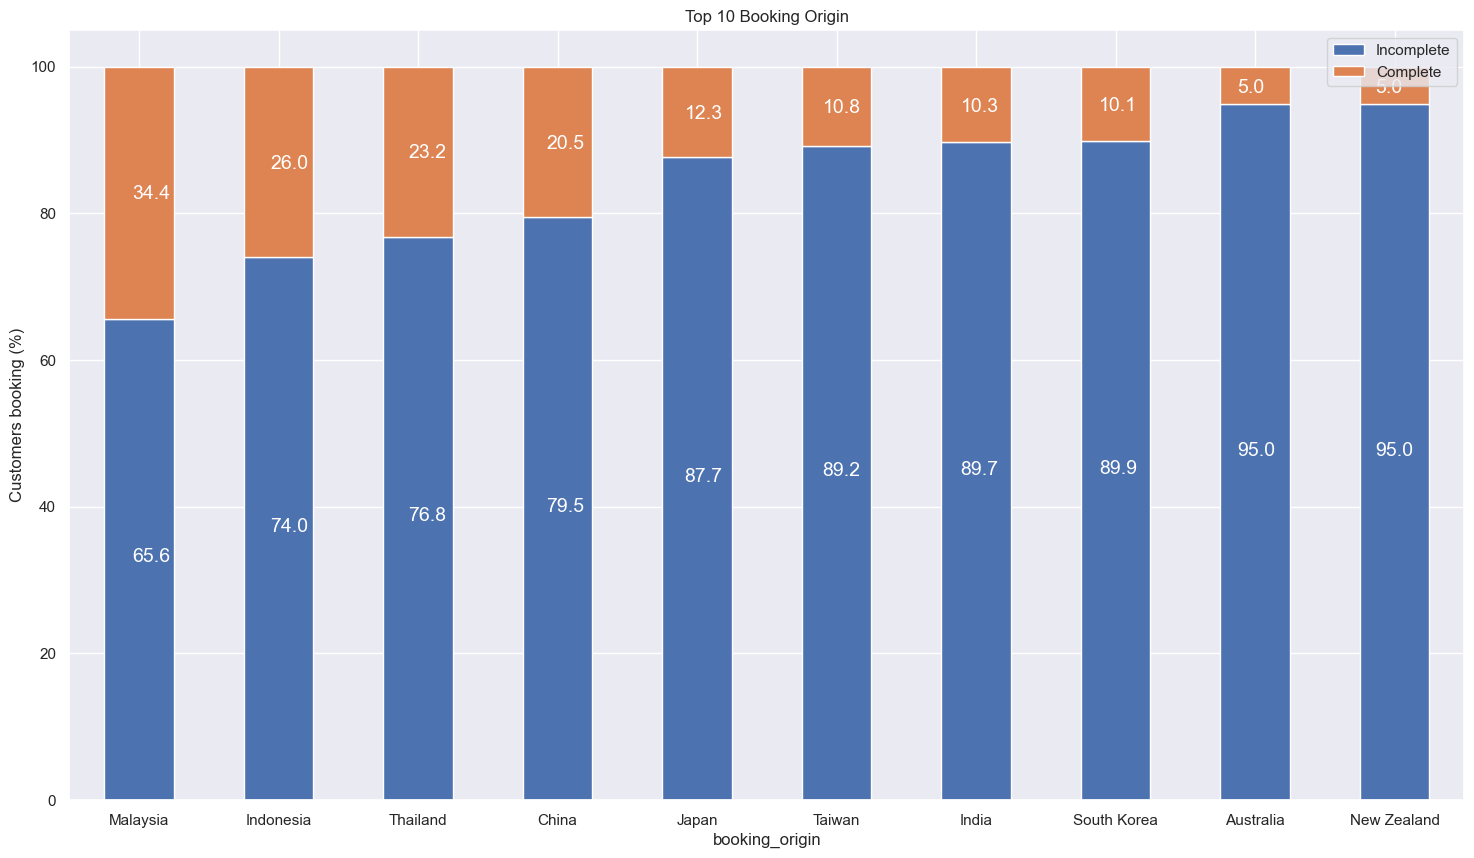

In [47]:
# Plot top 10 booking origin
plot_stacked_bars(top_10_book_origin_percentage, 
                 "Top 10 Booking Origin")

34% of customers who book from Malaysia completed their bookings while only 5% completed booking in Australia and New Zealand among the top 10 booking origins.

**Number of Passengers**

So far we have been viewing categorical features, now lets write a function to view continuous features

In [48]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_id
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,3
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,4


In [49]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of complete or incomplete
    customer booking.
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Incomplete": dataframe[dataframe["booking_complete"]==0][column],
    "Complete":dataframe[dataframe["booking_complete"]==1][column]})
    # Plot the histogram
    temp[["Incomplete","Complete"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [50]:
list(df.columns)

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete',
 'booking_id']

In [51]:
continous_df = df[['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_duration',
 'booking_complete',
 'booking_id']]

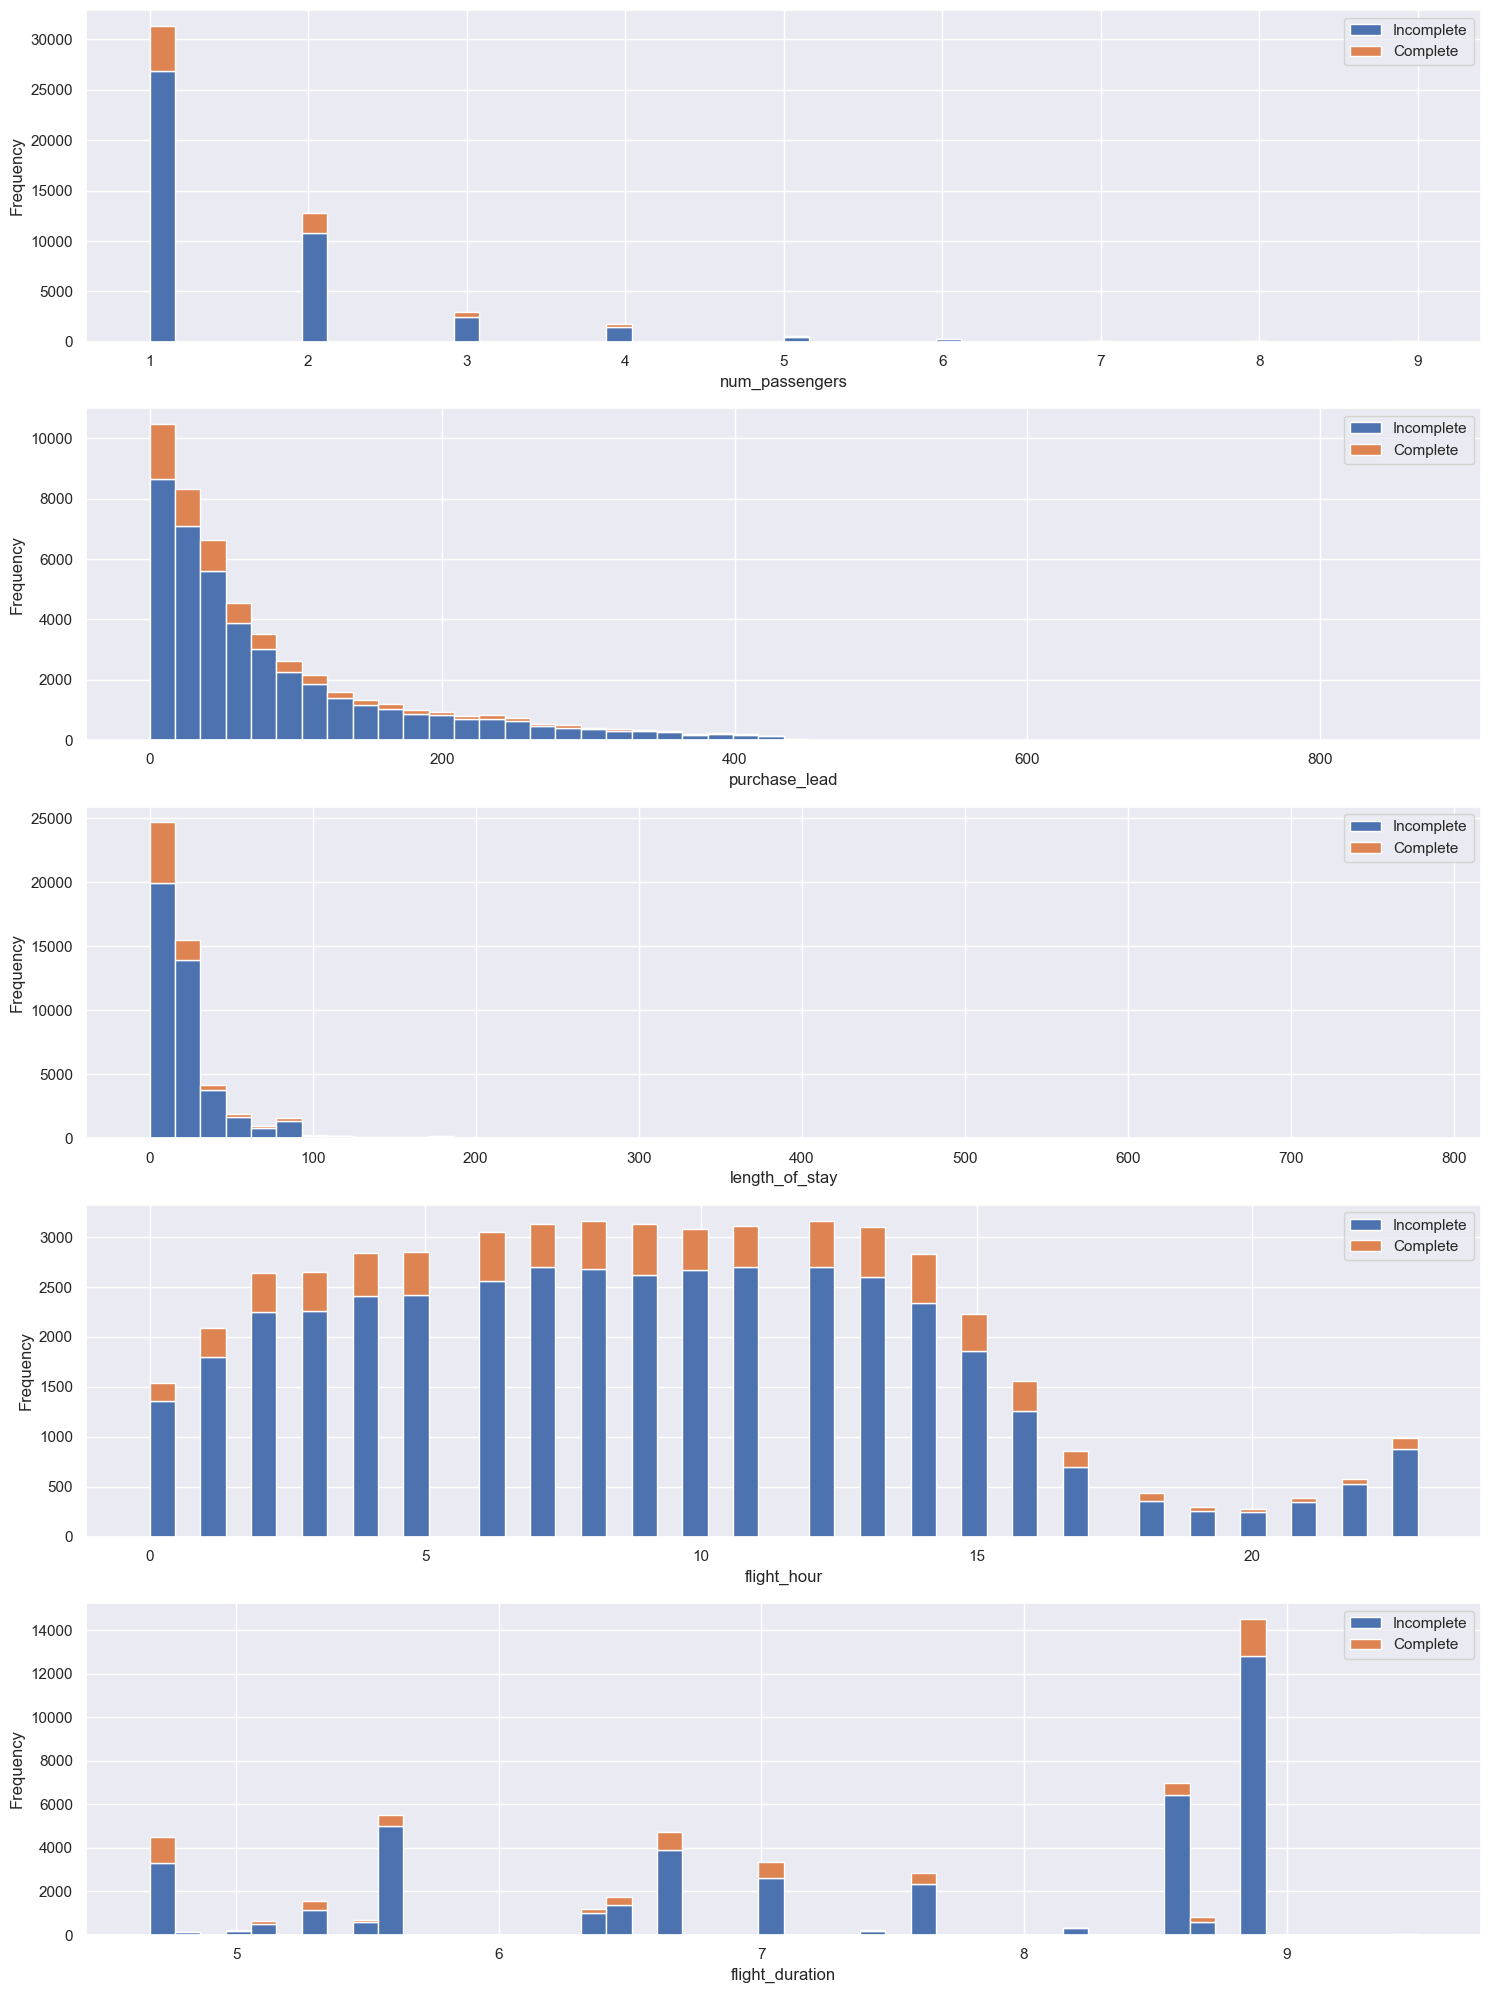

In [52]:
fig, ax = plt.subplots(nrows=5, figsize=(18,25))

plot_distribution(continous_df, 'num_passengers', ax[0])
plot_distribution(continous_df, "purchase_lead", ax[1])
plot_distribution(continous_df, 'length_of_stay', ax[2])
plot_distribution(continous_df, 'flight_hour', ax[3])
plot_distribution(continous_df, 'flight_duration', ax[4])

Some of the the continuous distribution are skewed to the right like `number of passengers`, `purchase lead`, and `length of stay`.

Now we will create a correlation plot to see how the features relate with the target variable `booking_complete`

In [53]:
df = df.drop(columns=["booking_id"])

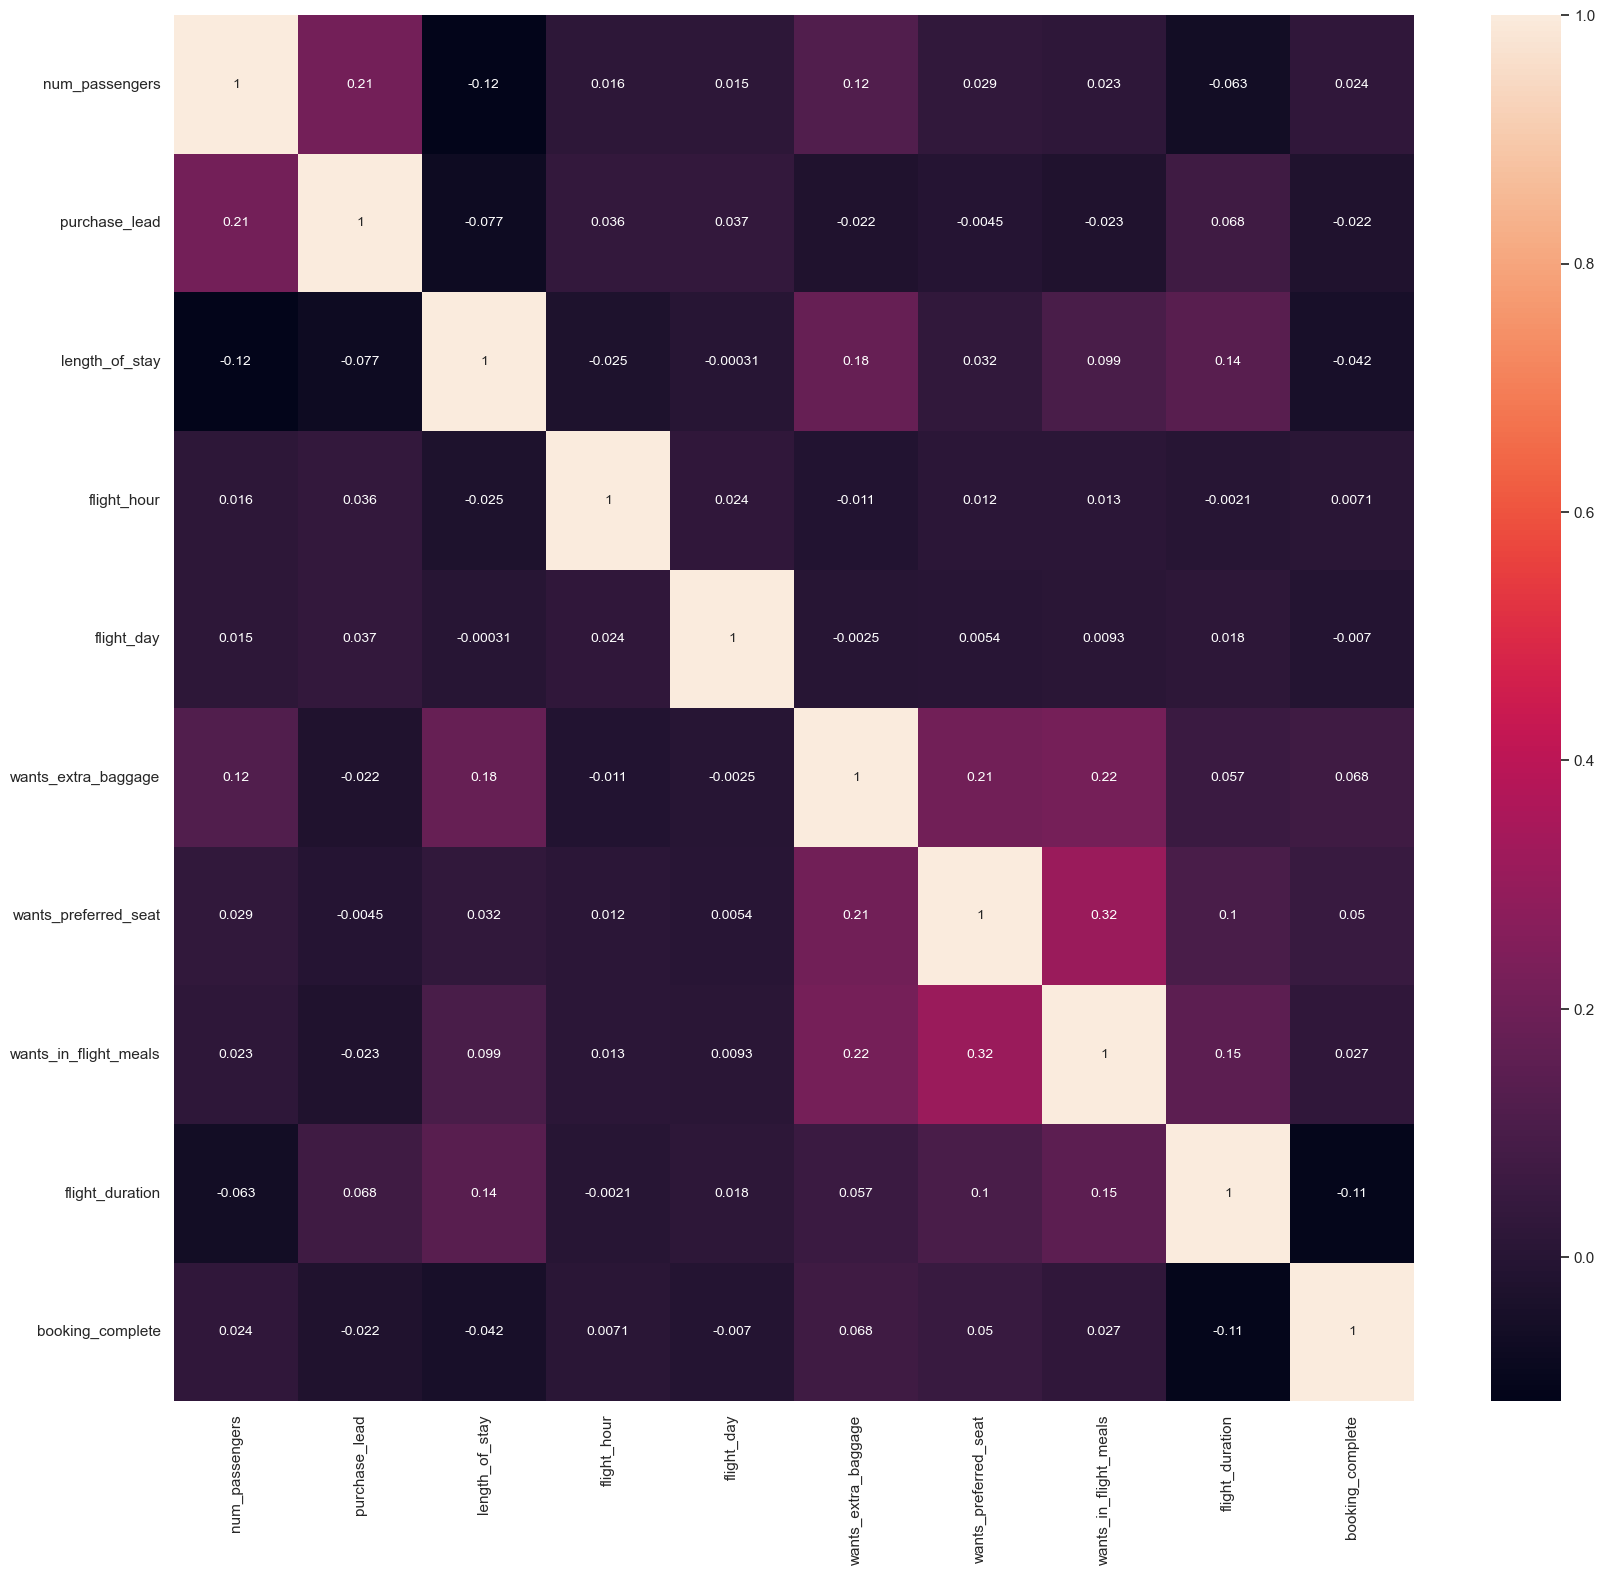

In [54]:
#  Create a correlation  dataframe
corr = df.corr(numeric_only=True)

# Plot correlation
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, annot_kws={'size':10});

From the correlation plot, the correlation with the booking_complete which s the target column is very low. We will need to engineer new features to improve the predictability of the of our model.

### 4. Preparing Data for Modeling

A predictive model cannot accept categorical string values, hence we need to encode categorical features into numerical representations in the most compact and discrimimative way possible.

In [56]:
# Create a copy of the dataframe
df_train = df.copy()

In [58]:
# Select the categorical/non-numerical columns
df_train.select_dtypes(include="object").columns

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

We have 4 object/categorical columns we need to transform.

**sales_channel**

In [59]:
# Transform into categorical type
df_train["sales_channel"] = df_train["sales_channel"].astype('category')

# Let's see how many categories are within this column
df_train["sales_channel"].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [63]:
df_train = pd.get_dummies(df_train, columns=["sales_channel"])

**trip_type**

In [66]:
# Transfor into category
df_train['trip_type'] = df_train['trip_type'].astype("category")

# lets's see howmany categories there are within this column
df_train['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [67]:
df_train = pd.get_dummies(df_train, columns=['trip_type'])

**route and booking_origin**

In [68]:
# Transform into categorical type
df_train["route"] = df_train["route"].astype("category")

# Let's see how many categories are within this column
df_train["route"].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
BDOWUH       1
CNXXIY       1
MELNRT       1
CNXDEL       1
URTXIY       1
Name: route, Length: 799, dtype: int64

In [69]:
# Transform into categorical type
df_train["booking_origin"] = df_train["booking_origin"].astype("category")

# Let's see how many categories are within this column
df_train["booking_origin"].value_counts()

Australia         17872
Malaysia           7174
South Korea        4559
Japan              3885
China              3387
                  ...  
Seychelles            1
Norfolk Island        1
Pakistan              1
Panama                1
Nicaragua             1
Name: booking_origin, Length: 104, dtype: int64

In [72]:
df_train.shape

(50000, 17)

In [75]:
df_train = pd.get_dummies(df_train, columns=["route", "booking_origin"])

### 5. Modelling

In [78]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Data sampling**

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 80-20% split between train and test respectively.

In [76]:
# seperate the target variable from the independent variable
X = df_train.drop(columns="booking_complete")
y = df_train["booking_complete"]

X.shape, y.shape 

((50000, 917), (50000,))

In [83]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                               y_test, 
                                               test_size=0.5)

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 917)
(40000,)
(5000, 917)
(5000,)
(5000, 917)
(5000,)


**Model training**

Let's create a base RandomForestClassifier model

In [85]:
# Base model with all the features and default parameters
model_1 = RandomForestClassifier()

model_1.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
# Evaluate our base model on the validation data set
model_1.score(X_val, y_val)

0.8542

In [87]:
# Train a model with 1000 estimators
model_2 = RandomForestClassifier(n_estimators=1000)

# Fit the model
model_2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [88]:
model_2.score(X_val, y_val)

0.854

In [89]:
def evaluate_preds(y_true, y_preds): 
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels 
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), 
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2), 
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

**Hyper parameter tuning with RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 4, 6],
    "n_estimators": [10, 100, 200, 500, 1000, 1200]
}

np.random.seed(42)

# Instantiate RansomForestCLassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid, 
                           n_iter=10, # The number of models to try
                           cv=5, 
                           verbose=0)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit